# Fetching data

**Table of contents**<a id='toc0_'></a>    
- 1. [Fetching data using an API](#toc1_)    
  - 1.1. [Import data from Denmark Statistics](#toc1_1_)    
  - 1.2. [FRED (Federal Reserve Economic Data)](#toc1_2_)    
  - 1.3. [World Bank indicators: `wb`](#toc1_3_)    
- 2. [A few examples of open access APIs](#toc2_)    
- 3. [Other sources](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

You may need to install the DST api-data reader, the pandas_datareader and the matplotlib_venn module. Uncomment the following cells and run to install.  
The %pip is a jupyter magic function, it is similar to writing pip install directly in your terminal/comand prompt. (see [Link](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)).  
You could also use a ! in front of each command, which indicates that this is a system command that may as well have been executed in the terminal/command prompt of your computer. 

In [1]:
# The DST API wrapper
%pip install git+https://github.com/elben10/pydst

  Cloning https://github.com/elben10/pydst to c:\users\krist\appdata\local\temp\pip-req-build-t6itkgko
  Resolved https://github.com/elben10/pydst to commit bb347560a1b3c17684fda072c829658da38f5a72
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/elben10/pydst 'C:\Users\krist\AppData\Local\Temp\pip-req-build-t6itkgko'


In [5]:
%pip install git+https://github.com/alemartinello/dstapi

  Cloning https://github.com/alemartinello/dstapi to c:\users\krist\appdata\local\temp\pip-req-build-pphkyhv_
  Resolved https://github.com/alemartinello/dstapi to commit 1c70fd31889fe025867efa4b6bd8cda5659a59f7
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dstapi: filename=dstapi-0.1-py3-none-any.whl size=3722 sha256=df7806ba18f9b0516bb7af2c86e2d41ce719be791159207de2c76490b03ec1a9
  Stored in directory: C:\Users\krist\AppData\Local\Temp\pip-ephem-wheel-cache-dhv2twlk\wheels\cf\02\c1\19c2d47a3995ed128565b5594e94b031247543f14ff788df65
Successfully built dstapi
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi 'C:\Users\krist\AppData\Local\Temp\pip-req-build-pphkyhv_'


In [2]:
# A wrapper for multiple APIs with a pandas interface
%pip install pandas-datareader


     -------------------------------------- 109.5/109.5 kB 1.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/elben10/pydst`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

## 1. <a id='toc1_'></a>[Fetching data using an API](#toc0_)

API stands for **Application Programming Interface**. An API is an interface through which we can directly ask for and **receive data from an online source**. We will be using packages for this and will not look at what is going on underneath. 

1. We use `pandas_datareader` to access many common **international online data** sources (install with `pip install pandas-datareader`)
2. For **Statistics Denmark**, Jakob Elben has written the `pydst` package (install with `pip install git+https://github.com/elben10/pydst`)

Fetching data from an API requires an **internet connection** and works directly without saving data to your harddisk (unless you ask Python to do so afterwards). You can use it to automate tasks such as fetching the most recent data, doing some calculations and outputting it in the same manner. This can be useful e.g. for quarterly reports. Remember to save the data on your computer if you really need for later though. The admins of the data may turn off the water..

**Pros:** Automatic; smart; everything is done from Python (so no need to remember steps in between). 

**Cons:** The connection can be slow or drop out, which may lead to errors. If e.g. 100 students simultaneously fetch data (during, say, a lecture), the host server may not be able to service all the requests and may drop out. 

> The raw output data from an API could look like this: https://stats.oecd.org/SDMX-JSON/data/NAAG. It is a log list of non-human-readable gobledygook in the so-called "JSON" format. 

### 1.1. <a id='toc1_1_'></a>[Import data from Denmark Statistics](#toc0_)

**Setup:**  
Create an dst api **object** that will allow us to interact with the DST server. 

In [4]:
ind=DstApi('INDKP107')

In [5]:
tabsum=ind.tablesummary(language='en')
display(tabsum)

Table INDKP107: Income, persons by region, unit, sex, level of education, type of income and time
Last update: 2022-11-24T08:00:00


variable name  # values First value                    First value label  \
0        OMRÅDE       115         000                          All Denmark   
1         ENHED         4         101  People with type of income (number)   
2          KOEN         3         MOK                 Men and women, total   
3        UDDNIV         7          10           10 BASIC SCHOOL 8-10 grade   
4  INDKOMSTTYPE        39         100  1 Disposable income (2+30-31-32-35)   
5           Tid        18        2004                                 2004   

  Last value                                   Last value label  Time variable  
0        851                                            Aalborg          False  
1        121  Average income for people with type of income ...          False  
2          K                                              Women          False  
3          9                                         Not stated          False  
4        290                                     Taxable income          False  
5       2021                                               2021           True

Data from DST are organized into: 

1. **Subjects:** indexed by numbers. Use `Dst.get_subjects()` to see the list. 
2. **Tables:** with names like "INDKP107". Use `Dst.get_tables(subjects=['X'])` to see all tables in a subject. 

**Data is extracted**  with `Dst.get_data(table_id = 'NAME', variables = DICT)`. 

In [6]:
for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

OMRÅDE:


id                     text
0    000              All Denmark
1    084       Region Hovedstaden
2     01  Province Byen København
3    101               Copenhagen
4    147            Frederiksberg
..   ...                      ...
110  773                    Morsø
111  840                   Rebild
112  787                  Thisted
113  820          Vesthimmerlands
114  851                  Aalborg

[115 rows x 2 columns]

ENHED:


id                                               text
0  101                People with type of income (number)
1  110                       Amount of income (DKK 1.000)
2  116                Average income for all people (DKK)
3  121  Average income for people with type of income ...

KOEN:


id                  text
0  MOK  Men and women, total
1    M                   Men
2    K                 Women

UDDNIV:


id                                           text
0  10                     10 BASIC SCHOOL 8-10 grade
1  26                   20+25 UPPER SECONDARY SCHOOL
2  35                        35 VOCATIONAL EDUCATION
3  40                40 SHORT-CYCLE HIGHER EDUCATION
4  61  50+60 MEDIUM-CYCLE HIGHER EDUCATION, BACHLEOR
5  65                 65 LONG-CYCLE HIGHER EDUCATION
6   9                                     Not stated

INDKOMSTTYPE:


id                                               text
0   100                1 Disposable income (2+30-31-32-35)
1   105             2 Pre-tax Income, total (3+7+22+26+29)
2   110                           3 Primary income (4+5+6)
3   115                   4 Wages and salaries etc., total
4   120                    5 Entrepreneurial income, total
5   125  6 Received fees subject to labour market contr...
6   130                 7 Public transfer incomes(8+14+19)
7   135   8 Unemployment and cash benefits (9+10+11+12+13)
8   140                            9 Unemployment benefits
9   145          10 Other benefits from unemployment funds
10  150                                   11 Cash benefits
11  155      12 Job training & Limited employment benefits
12  160                      13 Sickness- & parental leave
13  165                    14 Other transfers(15+16+17+18)
14  170                       15 Public educational grants
15  175                                16 Housing benefits
16  180                                  17 Child benefits
17  185                                     18 Green check
18  190                          19 Public pensions(20+21)
19  195                            20 Early retirement pay
20  200                 21 Disability and old age pensions
21  205                      22 Private pensions(23+24+25)
22  210                         23 Public servants pension
23  215  24 Pension from the ATP (Labour Market Supplem...
24  220  25 Labour market and private pensions (Annuiti...
25  225                   26 Capital income, gross (27+28)
26  230                               27 Interest received
27  235        28 Other property income (From stocks etc.)
28  240                           29 Other personal income
29  245                                    30 Imputed rent
30  250                               31 Interest expenses
31  255                              32 Tax, total (33+34)
32  260                                    33 Income taxes
33  265                34 Labour market contributions etc.
34  270                                  35 Paid alimonies
35  275                      Equivalised Disposable income
36  280                               Land tax home owners
37  285                                  Land tax, tenants
38  290                                     Taxable income

Tid:


id  text
0   2004  2004
1   2005  2005
2   2006  2006
3   2007  2007
4   2008  2008
5   2009  2009
6   2010  2010
7   2011  2011
8   2012  2012
9   2013  2013
10  2014  2014
11  2015  2015
12  2016  2016
13  2017  2017
14  2018  2018
15  2019  2019
16  2020  2020
17  2021  2021

In [7]:
params=ind._define_base_params(language='en')
params

{'table': 'indkp107',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'ENHED', 'values': ['*']},
  {'code': 'KOEN', 'values': ['*']},
  {'code': 'UDDNIV', 'values': ['*']},
  {'code': 'INDKOMSTTYPE', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [10]:
params={'table': 'indkp107',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'ENHED', 'values': ['110','116']},
  {'code': 'KOEN', 'values': ['M','K']},
  {'code': 'UDDNIV', 'values': ['65']},
  {'code': 'INDKOMSTTYPE', 'values': ['*']},
  {'code': 'Tid', 'values': ['>2008<=2014']}]}

In [12]:
inc_api=ind.get_data(params=params)
inc_api.head(5)

OMRÅDE                         ENHED   KOEN  \
0           Ærø  Amount of income (DKK 1.000)    Men   
1           Ærø  Amount of income (DKK 1.000)  Women   
2  Province Fyn  Amount of income (DKK 1.000)    Men   
3  Province Fyn  Amount of income (DKK 1.000)  Women   
4     Haderslev  Amount of income (DKK 1.000)    Men   

                           UDDNIV                     INDKOMSTTYPE   TID  \
0  65 LONG-CYCLE HIGHER EDUCATION  5 Entrepreneurial income, total  2009   
1  65 LONG-CYCLE HIGHER EDUCATION  5 Entrepreneurial income, total  2009   
2  65 LONG-CYCLE HIGHER EDUCATION  5 Entrepreneurial income, total  2009   
3  65 LONG-CYCLE HIGHER EDUCATION  5 Entrepreneurial income, total  2009   
4  65 LONG-CYCLE HIGHER EDUCATION  5 Entrepreneurial income, total  2009   

   INDHOLD  
0     6153  
1     2965  
2   493027  
3   267867  
4    54249

.. now you have a data set ready for cleaning and renaming.

### 1.2. <a id='toc1_2_'></a>[FRED (Federal Reserve Economic Data)](#toc0_)

**GDP data** for the US

In [13]:
# Need first to encode dates in a python friendly to specify the length of the desired time period. 
# Use the datetime module - it is the general way to handle dates in python. 
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2017,1,1)
timespan = end - start # We can investigate the precise time span by just subtracting to time variables.
print('total number of days:', timespan.days) # The timespan object has a days attribute.

total number of days: 4383


In [14]:
# Call the FRED api using pandas_datareader 
gdp = pandas_datareader.data.DataReader('GDP', 'fred', start, end)
gdp.head(10)

GDP
DATE                 
2005-01-01  12767.286
2005-04-01  12922.656
2005-07-01  13142.642
2005-10-01  13324.204
2006-01-01  13599.160
2006-04-01  13753.424
2006-07-01  13870.188
2006-10-01  14039.560
2007-01-01  14215.651
2007-04-01  14402.082

**Finding data:**

1. go to https://fred.stlouisfed.org 
2. search for data in main bar, e.g. employment and unemployment
3. click the first links
4. table name is next to header 

We now want to pull down data on aggregate employment (PAYEMS) and unemployment (UNEMPLOY) levels and then plot the development. 

**Pulling the data:**

In [15]:
start = datetime.datetime(1939,1,1)
end = datetime.datetime(2021,12,1)

# We can pull from multiple sources in one go. Just combine them in a list.
empl_us = pandas_datareader.data.DataReader(['PAYEMS', 'UNEMPLOY'], 'fred', start, end)

**Plot:**

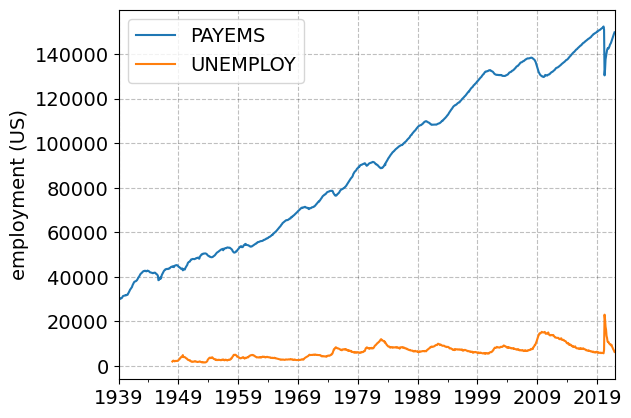

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Now we are just plotting directly from the pandas dataframe. Still using matplotlib under the hood.
empl_us.plot(ax=ax)

ax.legend(frameon=True)
ax.set_xlabel('')
ax.set_ylabel('employment (US)');

### 1.3. <a id='toc1_3_'></a>[World Bank indicators: `wb`](#toc0_)

**Finding data:**

1. go to https://data.worldbank.org/indicator/
2. search for GDP 
3. variable name ("NY.GDP.PCAP.KD") is in the URL

**Pull GDP numbers:**

In [17]:
# Need a different module than in the FRED case
from pandas_datareader import wb

In [18]:
wb_gdp = wb.download(indicator='NY.GDP.MKTP.CD', country=['SE','DK','NO'], start=1990, end=2017)

wb_gdp = wb_gdp.rename(columns = {'NY.GDP.MKTP.CD':'GDP'})
wb_gdp = wb_gdp.reset_index()
wb_gdp.sample(5)

country  year           GDP
82   Sweden  1991  2.742290e+11
46   Norway  1999  1.622845e+11
53   Norway  1992  1.308380e+11
6   Denmark  2011  3.440031e+11
50   Norway  1995  1.520296e+11

In [19]:
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     object 
 1   year     84 non-null     object 
 2   GDP      84 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.1+ KB


**Problems:** 
* It turns out that the dataframe has stored the variable *year* as an "object", meaning in practice that it is a string. This must be converted to an int, as we want to use it as a number. 
* *country* is in fact a text variable, so it is acceptable to have it as an object type. But pandas has implemented a string type on its own. It is called 'string', while the text type of object that you normally encounter is of type 'str'. Yes, confusing!!  But you want to get it right, because an object variable can also contain numbers in addition to text. Which is bad. 
* Fortunately, GDP is a float (i.e. a number). 

In [20]:
wb_gdp.year = wb_gdp.year.astype(int) # convert year
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     string 
 1   year     84 non-null     int32  
 2   GDP      84 non-null     float64
dtypes: float64(1), int32(1), string(1)
memory usage: 1.8 KB


**Fetch employment-to-population ratio:**

In [21]:
wb_empl = wb.download(indicator='SL.EMP.TOTL.SP.ZS', country=['SE','DK','NO'], start=1990, end=2017) # don't need the special datetime here.
wb_empl.rename(columns = {'SL.EMP.TOTL.SP.ZS':'employment_to_pop'}, inplace=True) # Better col name
wb_empl.reset_index(inplace = True)
wb_empl.year = wb_empl.year.astype(int)
wb_empl.sample(3)

country  year  employment_to_pop
78   Sweden  1995          57.544998
5   Denmark  2012          57.450001
65   Sweden  2008          59.898998

**Merge:**

In [22]:
wb = pd.merge(wb_gdp, wb_empl, how = 'outer', on = ['country','year']);
wb.head(5)

country  year           GDP  employment_to_pop
0  Denmark  2017  3.321211e+11          58.122002
1  Denmark  2016  3.131159e+11          57.957001
2  Denmark  2015  3.026731e+11          57.469002
3  Denmark  2014  3.529936e+11          57.014999
4  Denmark  2013  3.435844e+11          56.887001

## 2. <a id='toc2_'></a>[A few examples of open access APIs](#toc0_)

As already demonstrated, you can pull data from DST using their API. Just to give a few examples of where else you may find open access to data by API: 
* Check out the [documentation for pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). There is a bunch of economic data banks to access through that. 
* There is an API for [covid-19 data](https://pypi.org/project/covid19-data/) that draws on several sources. 
* The National Museum of Art (DK) gives access to their collection [by an API](https://www.smk.dk/article/smk-api/). 
* NASA has its own API. [Look here](https://api.nasa.gov/) for their documentation and [here](https://pypi.org/project/python-nasa-api/) for a Python wrapper. 

## 3. <a id='toc3_'></a>[Other sources](#toc0_)
* **A crazy large collection of APIs** found on [this Github repo](https://github.com/public-apis/public-apis). Stocks, government, map data, lol memes, anything..
* Datasets behind [FiveThirtyEight articles](https://github.com/fivethirtyeight/data)  (youknow.. [this site](https://fivethirtyeight.com/))